In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

import pickle

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
tr_Diesel = pd.read_csv('res_class_Table_main\\tr_Diesel.csv')
tr_Diesel.drop(['Rotation'], axis=1, inplace=True)

tr_RME = pd.read_csv('res_class_Table_main\\tr_RME.csv')
tr_RME.drop(['Rotation'], axis=1, inplace=True)

tr_Diesel_RME = pd.concat([tr_Diesel, tr_RME], ignore_index = True)
tr_Diesel_RME

,Unnamed: 0,Ciś. pow. za turb.[Pa],ECT - wyjście z sil.[°C],MAF[kg/h],Moc[kW],Moment obrotowy[Nm],Obroty[obr/min],Temp. oleju w misce[°C],Temp. pal. na wyjściu sil.[°C],Temp. powietrza za turb.[°C],...,HC,LAMBDA,CO2,O2,NO,PM,Сalorific value MJ/kg,Cetane number,Density at 15 °C,Viscosity at 40 °C
0,131246.0,50768.0,52.099998,502.500000,73.152602,290.029745,2407.0,73.0,44.599998,64.0,...,12.0,1.938,7.7,10.34,191.0,8.81,43.1,54.7,832.0,3.250
1,131258.0,50768.0,52.099998,502.500000,73.053347,290.029745,2407.0,73.0,44.599998,64.0,...,12.0,1.938,7.7,10.34,191.0,8.81,43.1,54.7,832.0,3.250
2,131260.0,50768.0,52.099998,502.500000,73.053347,290.029745,2407.0,73.0,44.599998,64.0,...,12.0,1.938,7.7,10.34,191.0,8.81,43.1,54.7,832.0,3.250
3,131280.0,50768.0,52.099998,502.500000,73.053347,290.128978,2407.0,73.0,44.599998,64.0,...,12.0,1.938,7.7,10.34,191.0,8.81,43.1,54.7,832.0,3.250
4,131291.0,50768.0,52.099998,502.500000,73.053347,290.128978,2407.0,73.0,44.599998,64.0,...,12.0,1.938,7.7,10.34,191.0,8.81,43.1,54.7,832.0,3.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44270,393851.0,26173.0,74.500000,213.100006,48.071665,353.187679,1299.0,98.0,55.099998,61.0,...,7.0,1.453,10.5,6.77,522.0,0.80,38.0,56.0,882.9,4.454
44271,393863.0,26173.0,74.500000,213.100006,48.071665,353.187679,1299.0,98.0,55.099998,61.0,...,7.0,1.453,10.5,6.77,522.0,0.80,38.0,56.0,882.9,4.454
44272,393883.0,26173.0,74.500000,213.100006,48.071665,353.187679,1299.0,98.0,55.099998,61.0,...,7.0,1.453,10.5,6.77,522.0,0.80,38.0,56.0,882.9,4.454
44273,393901.0,26173.0,74.500000,213.100006,48.071665,353.187679,1299.0,98.0,55.099998,61.0,...,7.0,1.453,10.5,6.77,522.0,0.80,38.0,56.0,882.9,4.454


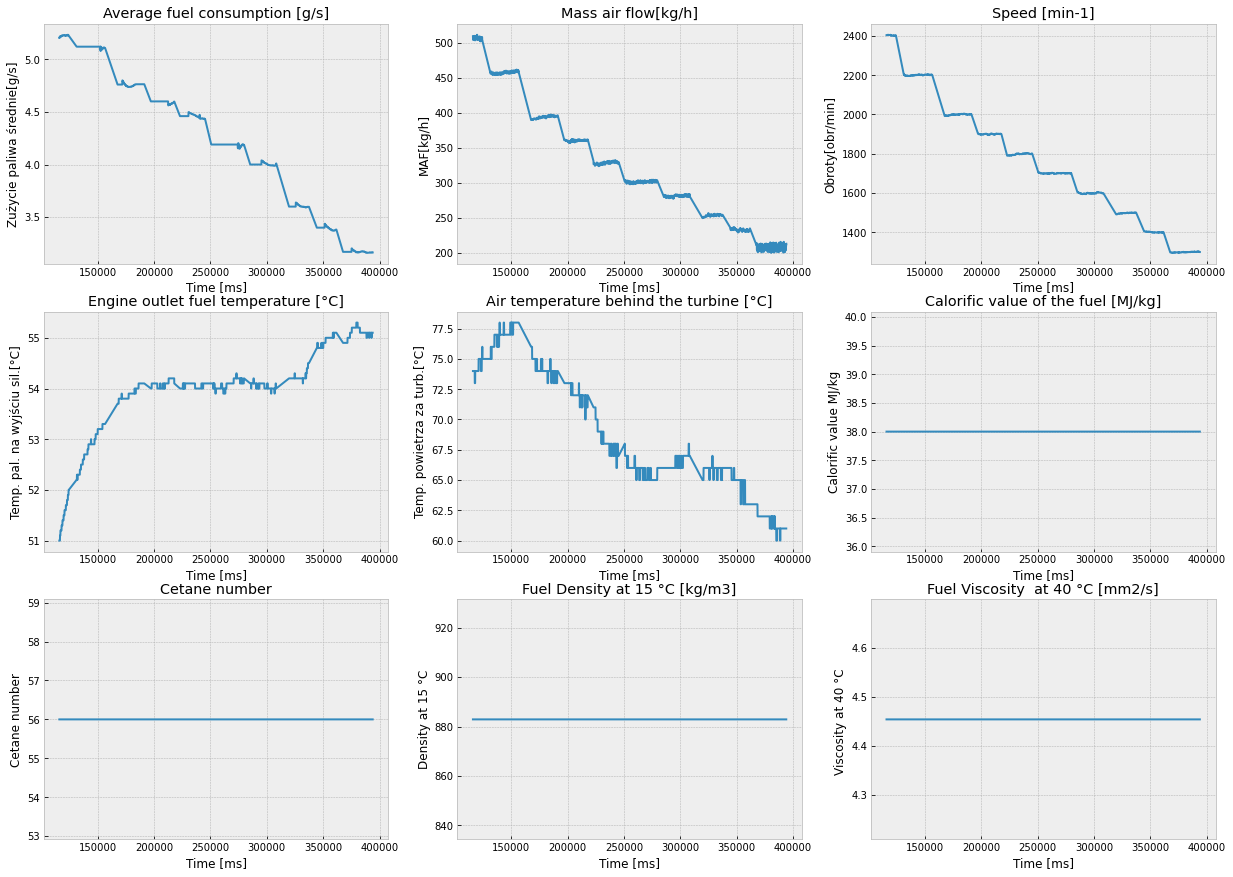

In [3]:
feature_col_names_pl = ['Zużycie paliwa średnie[g/s]', 
                        'MAF[kg/h]', 
                        'Obroty[obr/min]', 
                        'Temp. pal. na wyjściu sil.[°C]',
                        'Temp. powietrza za turb.[°C]',
                        'Сalorific value MJ/kg', 
            'Cetane number', 'Density at 15 °C', 'Viscosity at 40 °C ']

feature_col_names_eng = ['Average fuel consumption [g/s]', 
                         'Mass air flow[kg/h]', 
                         'Speed [min-1]', 
                         'Engine outlet fuel temperature [°C]',
                         'Air temperature behind the turbine [°C]',
                         'Сalorific value of the fuel [MJ/kg]', 
            'Cetane number', 'Fuel Density at 15 °C [kg/m3]', 'Fuel Viscosity  at 40 °C [mm2/s]']
                        
target_col_names_pl = ['PM', 'NO', 'CO', 'HC', 'CO2', 'Moment obrotowy[Nm]']
target_col_names_eng = ['PM', 'NO', 'CO', 'HC', 'CO2', 'Torque[Nm]']


plt.style.use('bmh')
fig1, ax1 = plt.subplots(3, 3, figsize=[21, 15], facecolor='w')

for i, name in enumerate(feature_col_names_pl):
    n_col, n_row = i//3, i%3
    ax1[n_col, n_row].plot(tr_RME.loc[:, 'Unnamed: 0'],   # x data
                           tr_RME.loc[:, name])           # y data
    ax1[n_col, n_row].set_title(feature_col_names_eng[i])
    ax1[n_col, n_row].set_xlabel('Time [ms]')
    ax1[n_col, n_row].set_ylabel(name)
    
fig1.savefig('res_class_Models\\feature_for_Artical.png')

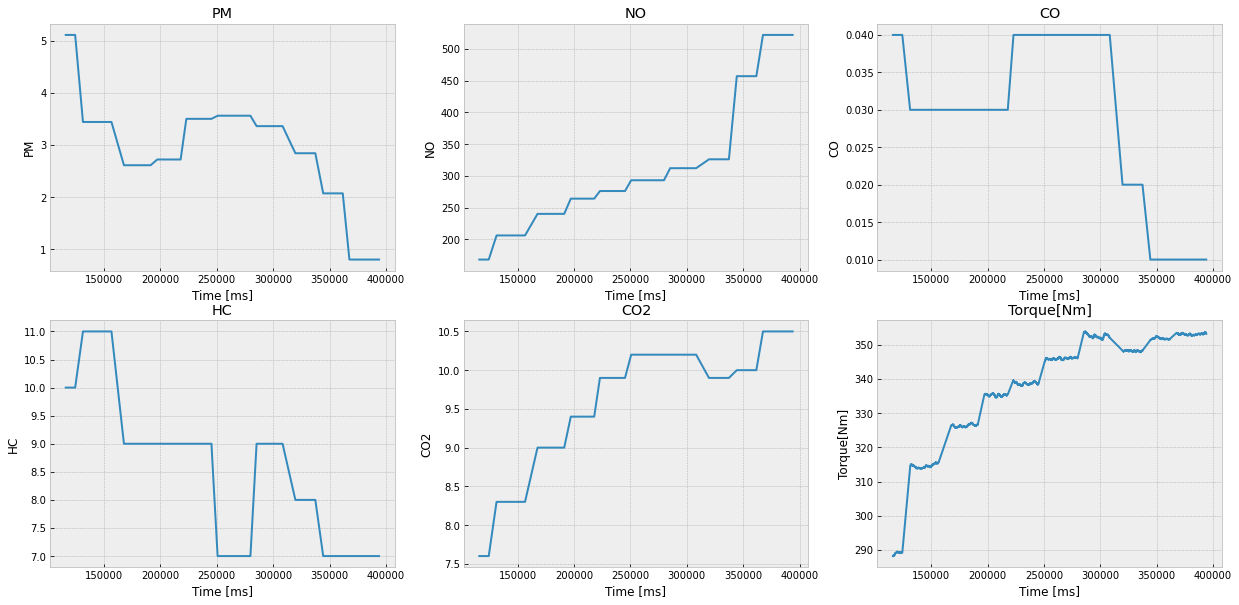

In [4]:
plt.style.use('bmh')
fig2, ax2 = plt.subplots(2, 3, figsize=[21, 10], facecolor='w')

for i, name in enumerate(target_col_names_pl):
    n_col, n_row = i//3, i%3
    ax2[n_col, n_row].plot(tr_RME.loc[:, 'Unnamed: 0'],   # x data
                           tr_RME.loc[:, name])           # y data
    ax2[n_col, n_row].set_title(target_col_names_eng[i])
    ax2[n_col, n_row].set_xlabel('Time [ms]')
    ax2[n_col, n_row].set_ylabel(target_col_names_eng[i])
    
fig2.savefig('res_class_Models\\target_for_Artical.png')

In [5]:
dict_model_params = open("res_class_Models\\dict_model_params_tr_Diesel_RME_20.09.2022_main_target(['PM', 'NO', 'CO', 'HC', 'CO2', 'Moment obrotowy[Nm]']).pkl", "rb")
output = pickle.load(dict_model_params)
tree_model = output['DT: model_DT_best']
tree_model

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=30, min_samples_split=400,
                      random_state=0)

In [6]:
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_col_names_eng)
graph = graphviz.Source(tree_graph)
graph.render("res_class_Models\\111.png",view = True)


'res_class_Models\\111.png.pdf'